In [164]:
# This code is written to support the experiments in the book titled:
# "Adaptive Machine Learning Algorithms"
# by
# Chanchal Chatterjee and Vwani P. Roychowdhury
# August 2021
#
# Experiments for Chapter 3 - Square Root of a Matrix
#
# Author: Chanchal Chatterjee
#

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf


In [186]:
# Number of samples N and dimension D
nSamples = 1000
nDim     = 10
nEpochs  = 1

In [187]:
# Generate the covX random matrices
cov = 3*np.array([ \
    [ 0.0910,  0.0380, -0.0530, -0.0050,  0.0100, -0.1360,  0.1550,  0.0300,  0.0020,  0.0320 ], \
    [ 0.0380,  0.3730,  0.0180, -0.0280, -0.0110, -0.3670,  0.1540, -0.0570, -0.0310, -0.0650 ], \
    [-0.0530,  0.0180,  1.4300,  0.0170,  0.0550, -0.4500, -0.0380, -0.2980, -0.0410, -0.0300 ], \
    [-0.0050, -0.0280,  0.0170,  0.0840, -0.0050,  0.0160,  0.0420, -0.0220,  0.0010,  0.0050 ], \
    [ 0.0100, -0.0110,  0.0550, -0.0050,  0.0710,  0.0880,  0.0580, -0.0690, -0.0080,  0.0030 ], \
    [-0.1360, -0.3670, -0.4500,  0.0160,  0.0880,  5.7200, -0.5440, -0.2480,  0.0050,  0.0950 ], \
    [ 0.1550,  0.1540, -0.0380,  0.0420,  0.0580, -0.5440,  2.7500, -0.3430, -0.0110, -0.1200 ], \
    [ 0.0300, -0.0570, -0.2980, -0.0220, -0.0690, -0.2480, -0.3430,  1.4500,  0.0780,  0.0280 ], \
    [ 0.0020, -0.0310, -0.0410,  0.0010, -0.0080,  0.0050, -0.0110,  0.0780,  0.0670,  0.0150 ], \
    [ 0.0320, -0.0650, -0.0300,  0.0050,  0.0030,  0.0950, -0.1200,  0.0280,  0.0150,  0.3410 ]])
print(cov/3)

[[ 9.10e-02  3.80e-02 -5.30e-02 -5.00e-03  1.00e-02 -1.36e-01  1.55e-01
   3.00e-02  2.00e-03  3.20e-02]
 [ 3.80e-02  3.73e-01  1.80e-02 -2.80e-02 -1.10e-02 -3.67e-01  1.54e-01
  -5.70e-02 -3.10e-02 -6.50e-02]
 [-5.30e-02  1.80e-02  1.43e+00  1.70e-02  5.50e-02 -4.50e-01 -3.80e-02
  -2.98e-01 -4.10e-02 -3.00e-02]
 [-5.00e-03 -2.80e-02  1.70e-02  8.40e-02 -5.00e-03  1.60e-02  4.20e-02
  -2.20e-02  1.00e-03  5.00e-03]
 [ 1.00e-02 -1.10e-02  5.50e-02 -5.00e-03  7.10e-02  8.80e-02  5.80e-02
  -6.90e-02 -8.00e-03  3.00e-03]
 [-1.36e-01 -3.67e-01 -4.50e-01  1.60e-02  8.80e-02  5.72e+00 -5.44e-01
  -2.48e-01  5.00e-03  9.50e-02]
 [ 1.55e-01  1.54e-01 -3.80e-02  4.20e-02  5.80e-02 -5.44e-01  2.75e+00
  -3.43e-01 -1.10e-02 -1.20e-01]
 [ 3.00e-02 -5.70e-02 -2.98e-01 -2.20e-02 -6.90e-02 -2.48e-01 -3.43e-01
   1.45e+00  7.80e-02  2.80e-02]
 [ 2.00e-03 -3.10e-02 -4.10e-02  1.00e-03 -8.00e-03  5.00e-03 -1.10e-02
   7.80e-02  6.70e-02  1.50e-02]
 [ 3.20e-02 -6.50e-02 -3.00e-02  5.00e-03  3.00e-03  9.

In [188]:
from scipy.linalg import eigh

eigvals, eigvecs = eigh(cov)
print("eigvals =\n", eigvals[::-1])

V = np.fliplr(eigvecs)
D  = np.diag(np.sqrt(eigvals[::-1]))
R = np.random.normal(0, 1, (nDim, nSamples))
X = V @ D @ R
X.shape

eigvals =
 [17.69943711  8.3465813   5.12625925  3.0883194   1.18090213  0.88164691
  0.26140372  0.21349209  0.18194518  0.15101291]


(10, 1000)

In [190]:
# Square root of the correlation matrix
from scipy.linalg import eigh

# Compute Correlation matrix and eigen vectors of the generated data
corX = (X @ X.T) / nSamples

# Eigenvalues and eigenvectors of corX
eigvals, eigvecs = eigh(corX)
print("eigvals =\n", eigvals[::-1])

V = np.fliplr(eigvecs)
D  = np.diag(np.sqrt(eigvals[::-1]))
Ah = V @ D @ V.T
Ah.shape


eigvals =
 [17.65481001  9.21411348  4.74635748  3.01840113  1.25113742  0.87095498
  0.24755863  0.2143331   0.17552951  0.15439083]


(10, 10)

In [191]:
# Adaptive algorithm
from numpy import linalg as la

A = np.zeros(shape=(nDim,nDim)) # stores adaptive correlation matrix
W1 = np.identity(nDim) # weight matrix Alg 1
W2 = np.identity(nDim) # weight matrix Alg 2
W3 = np.identity(nDim) # weight matrix Alg 3

err1 = np.zeros(shape=(nSamples*nEpochs))
err2 = np.zeros(shape=(nSamples*nEpochs))
err3 = np.zeros(shape=(nSamples*nEpochs))
err4 = np.zeros(shape=(nSamples*nEpochs))

for epoch in range(nEpochs):
    for iter in range(nSamples):
        cnt = nSamples*epoch + iter
      
        x = X[:,iter]
        x = x.reshape(nDim,1)
        A = A + (1.0/(1 + cnt))*((np.dot(x, x.T)) - A)
        etat1 = 1.0/(50 + cnt)
        etat2 = 1.0/(50 + cnt)
      
        # Algorithm 1
        W1 = W1 + etat1 * (W1 @ A - W1 @ W1.T @ W1)
      
        # Algorithm 2
        W2 = W2 + etat1 * (A @ W2 - W2 @ W2.T @ W2)
      
        # Algorithm 3
        W3 = W3 + etat2 * (A - W3 @ W3)
      
        err1[cnt] = la.norm(A - W1.T @ W1, 'fro')
        err2[cnt] = la.norm(A - W2 @ W2.T, 'fro')
        err3[cnt] = la.norm(A - W3 @ W3, 'fro')
        err4[cnt] = la.norm(Ah - W3, 'fro')


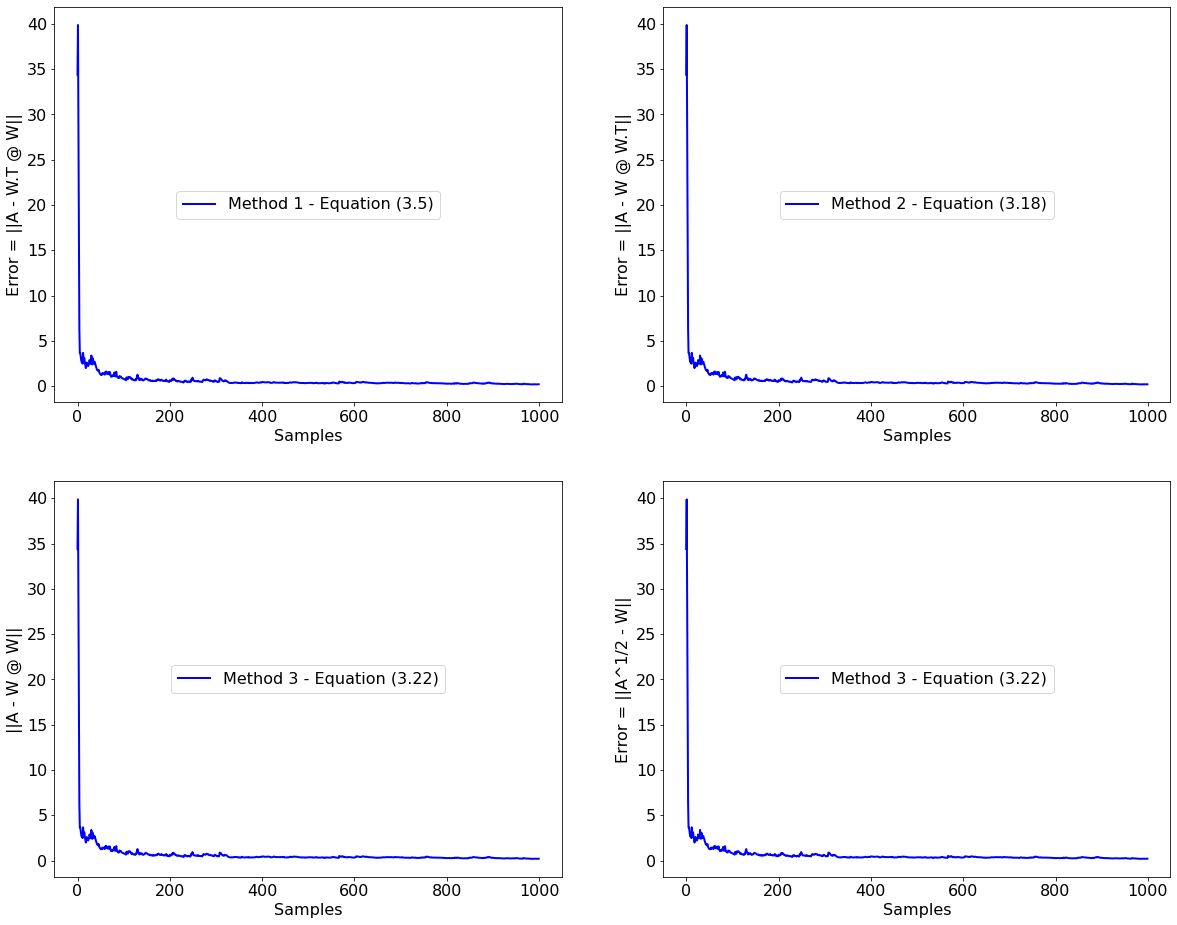

In [201]:
plt.figure(figsize=(20, 16))
plt.rcParams.update({'font.size': 16})

plt.subplot(2, 2, 1)
plt.plot(err1, lw=2, color='b', label="Method 1 - Equation (3.5)")
plt.ylabel('Error = ||A - W.T @ W||')
plt.xlabel('Samples')
plt.legend(loc="center")

plt.subplot(2, 2, 2)
plt.plot(err2, lw=2, color='b', label="Method 2 - Equation (3.18)")
plt.ylabel('Error = ||A - W @ W.T||')
plt.xlabel('Samples')
plt.legend(loc="center")

plt.subplot(2, 2, 3)
plt.plot(err2, lw=2, color='b', label="Method 3 - Equation (3.22)")
plt.ylabel('||A - W @ W||')
plt.xlabel('Samples')
plt.legend(loc="center")

plt.subplot(2, 2, 4)
plt.plot(err2, lw=2, color='b', label="Method 3 - Equation (3.22)")
plt.ylabel('Error = ||A^1/2 - W||')
plt.xlabel('Samples')
plt.legend(loc="center")

plt.show()